<a href="https://colab.research.google.com/github/ktabata117/classmaterial_public/blob/master/text_study_NS_2_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#日本語への対応


# グラフに日本語フォントで出力するには

一番簡単なのは，japanize-matplotlib を使う方法です．

### インストール

~~~ 
!pip install japanize-matplotlib
~~~

### 使い方

~~~
import matplotlib.pyplot as plt
import japanize_matplotlib 
~~~

pip インストールは japanize-matplotlib とハイフンなのに，import はアンダースコアであることに注意


In [ ]:
!pip install Japanize-matplotlib

     |████████████████████████████████| 4.1MB 4.9MB/s 
  Created wheel for Japanize-matplotlib: filename=japanize_matplotlib-1.1.3-cp37-none-any.whl size=4120276 sha256=d5e5b3715cf36d8422dc8623b4e07a16cd92ba9adfb993e7dbbebaa05c37dca1
  Stored in directory: /root/.cache/pip/wheels/b7/d9/a2/f907d50b32a2d2008ce5d691d30fb6569c2c93eefcfde55202
Successfully built Japanize-matplotlib


新しい章　4章

In [ ]:
from collections import Counter
string = "This is a pen"
cnt =Counter(string)
print(cnt)


Counter({' ': 3, 'i': 2, 's': 2, 'T': 1, 'h': 1, 'a': 1, 'p': 1, 'e': 1, 'n': 1})


辞書型で出力される

In [ ]:
# 今度は日本語
from collections import Counter
string = "本日は晴天なり。日本は晴天"
cnt =Counter(string)
print(cnt)


Counter({'本': 2, '日': 2, 'は': 2, '晴': 2, '天': 2, 'な': 1, 'り': 1, '。': 1})


sent_tokenize
reserve 大きい方から（降順）の指示
cnt は辞書型のデータなので、cnt.item()
ソートのKEYを指定 lambda x:x[1] ０からカウント始めるので1になる

In [ ]:

import nltk
# 一気にダウンロードできないので、少しづつやってみた
nltk.download('inaugural')


[nltk_data] Downloading package inaugural to /root/nltk_data...
[nltk_data]   Unzipping corpora/inaugural.zip.


True

In [ ]:
import matplotlib.pyplot as plt
import japanize_matplotlib  # ! pip japanize_matplotlib からしないとダメ
import numpy as np
import nltk
from nltk.corpus import inaugural
from collections import Counter
text = inaugural.raw('1789-Washington.txt')
sents = nltk.tokenize.sent_tokenize(text)
cnt = Counter(len(sent.split()) for sent in sents) #text と違う
print(sorted(cnt.items(), key=lambda x: [x[1], x[0]], reverse=True))
 
nstring = np.array( [len(sent.split()) for sent in sents] )
plt.hist(nstring)
plt.title('1789年ワシントン就任演説の文ごとの単語数分布')
plt.xlabel('文の単語数')
plt.ylabel('出現頻度')
plt.show()


ModuleNotFoundError: ignored

第5章

# 第5章の１　GRMという概念

In [ ]:
# -*- coding: utf-8 -*-
# リスト 5-1  N-gram を切り出して出現回数を数えるプログラム例
from collections import Counter
import numpy as np
string = "吾輩は猫である。名前はまだ無い。"
delimiter = ['「', '」', '…', '　']
 
doublets = list(zip(string[:-1], string[1:]))
doublets = filter((lambda x: not((x[0] in delimiter) or (x[1] in delimiter)) ),  \
                  doublets)
 
triplets = list(zip(string[:-2], string[1:-1], string[2:]))
triplets = filter((lambda x: not((x[0] in delimiter) or (x[1] in delimiter) or \
                                 (x[2] in delimiter))), triplets)
 
dic2 = Counter(doublets)
for k,v in sorted(dic2.items(), key=lambda x:x[1], reverse=True)[:50] :
    print(k, v)
 
dic3 = Counter(triplets)
for k,v in sorted(dic3.items(), key=lambda x:x[1], reverse=True)[:50] :
    print(k, v)


('吾', '輩') 1
('輩', 'は') 1
('は', '猫') 1
('猫', 'で') 1
('で', 'あ') 1
('あ', 'る') 1
('る', '。') 1
('。', '名') 1
('名', '前') 1
('前', 'は') 1
('は', 'ま') 1
('ま', 'だ') 1
('だ', '無') 1
('無', 'い') 1
('い', '。') 1
('吾', '輩', 'は') 1
('輩', 'は', '猫') 1
('は', '猫', 'で') 1
('猫', 'で', 'あ') 1
('で', 'あ', 'る') 1
('あ', 'る', '。') 1
('る', '。', '名') 1
('。', '名', '前') 1
('名', '前', 'は') 1
('前', 'は', 'ま') 1
('は', 'ま', 'だ') 1
('ま', 'だ', '無') 1
('だ', '無', 'い') 1
('無', 'い', '。') 1


In [ ]:
# -*- coding: utf-8 -*-
# リスト 5-2  JEITA コーパスから単語 N-gram 頻度データを生成するプログラム例
from collections import Counter
import numpy as np
from numpy.random import *
import nltk
from nltk.corpus.reader.chasen import *
# JEITAコーパスデータの読み込み
jeita = ChasenCorpusReader('/content/sample_data','1000.chasen', encoding='utf-8')
delimiter = ['「', '」', '…', '　']  # N-gramデータで対象外にする文字のリスト
string = jeita.words()
doublets = list(zip(string[:-1], string[1:]))
doublets = filter((lambda x: not((x[0] in delimiter) or (x[1] in delimiter)) ), \
                   doublets)

triplets = list(zip(string[:-2], string[1:-1], string[2:]))
triplets = filter((lambda x: not((x[0] in delimiter) or (x[1] in delimiter) or \
                                 (x[2] in delimiter))), triplets)
dic2 = Counter(doublets)  # 2-gramの出現回数リスト
dic3 = Counter(triplets)  # 3-gramの出現回数リスト
for u,v in dic2.items():
    print(u, v)
for u,v in dic3.items():
    print(u, v)

def gennext(words, dic):  # N-gram辞書dicと直前の1語/2語から、次の語を選んで返す
    grams = len(words)    # 2-gramか3-gramかを、与えたwordが2語か3語かによって決める
    if grams==2:
        matcheditems = np.array(list(filter( (lambda x: x[0][0] == words[1]),
              dic.items() )) )  # 2-gramの第2項がほしい語words[1]であるものを集める
    else:
        matcheditems = np.array(list(filter(
             # 3-gramの第2・3項がほしい語words[1], words[2]であるものを集める
             (lambda x: x[0][0] == words[1]) and (lambda x: x[0][1] == words[2]),
              dic.items() )) )
    if (len(matcheditems) == 0):  # ほしい語のパターンがN-gram辞書にない場合は中止する
        print("No matched generator for", words[1])
        return ''
    probs = [row[1] for row in matcheditems]      # N-gram辞書の出現回数部分を取り出す
    weightlist = rand(len(matcheditems)) * probs  # 乱数rand(項数)を要素ごとに掛ける
    if grams==2:
        # 重み最大になる2-gramの2語目を取り出す
        u = matcheditems[np.argmax(weightlist)][0][1]
    else:
        # 重み最大になる3-gramの3語目を取り出す
        u = matcheditems[np.argmax(weightlist)][0][2]
    return u
# 以下メインプログラム 
#words = ['', '子規']       # 2-gramのときの初期シーケンス
words = ['', '子規', 'の']  # 3-gramのときの初期シーケンス
output = words[1:]          # 出力outputの先頭に初期シーケンスを埋め込む
for i in range(50):         # 最大で50語まで生成（「。」などが来れば停止）
    if len(words) == 2:
        newword = gennext(words, dic2)     # 2-gram時の次の語の生成
    else:
        newword = gennext(words, dic3)     # 3-gram時の次の語の生成
    output.append(newword)                 # 出力シーケンスoutputに次の語を加える
    if newword in ['', '。', '？', '！']:  # 次の語が終端なら生成終了
        break
    words = output[-len(words):]           # 次のgentextの入力を準備する
for u in output:
    print(u, end='')
print()


('ありふれ', 'た') 1
('た', '従来') 1
('従来', 'の') 1
('の', '日本') 2
('日本', '文学') 1
('文学', '史') 1
('史', 'を') 1
('を', 'みる') 1
('みる', 'と') 1
('と', '、') 2
('、', '明治') 1
('明治', '三十') 1
('三十', '年代') 1
('年代', 'に') 1
('に', '写生') 2
('写生', '文学') 1
('文学', 'という') 1
('という', 'もの') 3
('もの', 'を') 1
('を', 'はじめて') 1
('はじめて', '提唱') 1
('提唱', 'し') 1
('し', 'た') 5
('た', '文学') 2
('文学', '者') 1
('者', 'として') 1
('として', '正岡子規') 1
('正岡子規', '、') 1
('、', '高浜') 1
('高浜', '虚子') 1
('虚子', 'や') 1
('や', '『') 1
('『', 'ホトトギス') 1
('ホトトギス', '』') 1
('』', '派') 1
('派', 'の') 6
('の', 'こと') 2
('こと', 'は') 3
('は', '出') 1
('出', 'て') 1
('て', '来る') 1
('来る', 'が') 1
('が', '、') 3
('、', '長塚') 1
('長塚', '節') 6
('節', 'の') 4
('は', 'とりたて') 1
('とりたて', 'て') 1
('て', '触れ') 1
('触れ', 'られ') 1
('られ', 'て') 1
('て', 'い') 5
('い', 'ない') 2
('ない', '。') 1
('明治', '十二') 1
('十二', '年') 1
('年', 'に') 2
('に', '茨城') 1
('茨城', '県') 1
('県', 'の') 1
('の', '国') 1
('国', '生') 1
('生', 'という') 1
('という', '村') 1
('村', 'の') 1
('の', '相当') 1
('相当', 'の') 1
('の', '家') 1
('家', 'に') 1
('に', '生れ') 1
(

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
import nltk
from nltk.corpus.reader import *
from nltk.corpus.reader.util import *
from nltk.text import Text
jp_sent_tokenizer = nltk.RegexpTokenizer(u'[^　「」！？。]*[！？。]')
jp_chartype_tokenizer = nltk.RegexpTokenizer(u'([ぁ-んー]+|[ァ-ンー]+|[\u4e00-\
... \u9FFF]+|[^ぁ-んァ-ンー\u4e00-\u9FFF]+)') 

In [ ]:
# -*- coding: utf-8 -*-
# リスト 5-3  生成した単語 N-gram 頻度データから文を生成するプログラム例
def gennext(words, dic):  # N-gram辞書dicと直前の1語/2語から、次の語を選んで返 す
    grams = len(words)    # 2-gramか3-gramかを、与えたwordが２語か３語かによっ て決める
    if grams==2:
        matcheditems = np.array(list(filter( (lambda x: x[0][0] == words[1]),
              dic.items() )) )  # 2-gramの第２項が欲しい語words[1]であるものを 集める
    else:
        matcheditems = np.array(list(filter(
             (lambda x: x[0][0] == words[1]) and (lambda x: x[0][1] == words[2]),
              dic.items() )) )  # 3-gramの第２・３項が欲しい語words[1], words[2]であるものを集める
    if (len(matcheditems) == 0):   # 欲しい語のパターンがN-gram辞書に無い場合は中止する
        print("No matched generator for", words[1])
        return ''
    probs = [row[1] for row in matcheditems]    # N-gram辞書の出現回数部分を取 出す
    weightlist = rand(len(matcheditems)) * probs  # 乱数rand(項数)を要素ごとに 掛ける
    if grams==2:
        u = matcheditems[np.argmax(weightlist)][0][1]  # 重み最大になる2gramの ２語目を取出す
    else:
        u = matcheditems[np.argmax(weightlist)][0][2]  # 重み最大になる3gramの ３語目を取出す
    return u
# 以下メインプログラム
#words = ['', '子規']         # 2-gramの時の初期シーケンス
words = ['', '子規', 'の']    # 3-gramの時の初期シーケンス
output = words[1:]            # 出力outputの先頭に初期シーケンスを埋め込む
for i in range(50):          # 最大で50語まで生成（「。」などが来れば停止）
    if len(words) == 2:
        newword = gennext(words, dic2)  # 2-gram時の次の語の生成
    else:
        newword = gennext(words, dic3)  # 3-gram時の次の語の生成
    output.append(newword)              # 出力シーケンスoutputに次の語を加える
    if newword in ['', '。', '？', '！']:  # 次の語が終端なら生成終了
        break
    words = output[-len(words):]      # 次のgentextの入力を準備する
for u in output:
    print(u, end='')
print()


No matched generator for 一月
子規の人々が没し『新小説』などに和歌をもつ節の人々、封建的潮流は明治三十一年一月〕


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # This is added back by InteractiveShellApp.init_path()


# 第5章の２　中心性による共和の考え方

*   mecabをインストールするための準備、さらに、igraph ではなくjgrahpへ



In [ ]:
!apt install aptitude swig
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
!pip install mecab-python3==0.996.3

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  aptitude-common libcgi-fast-perl libcgi-pm-perl libclass-accessor-perl
  libcwidget3v5 libencode-locale-perl libfcgi-perl libhtml-parser-perl
  libhtml-tagset-perl libhttp-date-perl libhttp-message-perl libio-html-perl
  libio-string-perl liblwp-mediatypes-perl libparse-debianchangelog-perl
  libsigc++-2.0-0v5 libsub-name-perl libtimedate-perl liburi-perl libxapian30
  swig3.0
Suggested packages:
  aptitude-doc-en | aptitude-doc apt-xapian-index debtags tasksel
  libcwidget-dev libdata-dump-perl libhtml-template-perl libxml-simple-perl
  libwww-perl xapian-tools swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  aptitude aptitude-common libcgi-fast-perl libcgi-pm-perl
  libclass-accessor-perl libcwidget3v5 libencode-locale-perl libfcgi-perl
  libhtml-parser-perl libhtml-tagset-perl libhttp

In [ ]:
!git clone --depth 1 https://github.com/neologd/mecab-ipadic-neologd.git
!echo yes | mecab-ipadic-neologd/bin/install-mecab-ipadic-neologd -n -a

Cloning into 'mecab-ipadic-neologd'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 75 (delta 5), reused 54 (delta 0), pack-reused 0
Unpacking objects: 100% (75/75), done.
[install-mecab-ipadic-NEologd] : Start..
[install-mecab-ipadic-NEologd] : Check the existance of libraries
[install-mecab-ipadic-NEologd] :     find => ok
[install-mecab-ipadic-NEologd] :     sort => ok
[install-mecab-ipadic-NEologd] :     head => ok
[install-mecab-ipadic-NEologd] :     cut => ok
[install-mecab-ipadic-NEologd] :     egrep => ok
[install-mecab-ipadic-NEologd] :     mecab => ok
[install-mecab-ipadic-NEologd] :     mecab-config => ok
[install-mecab-ipadic-NEologd] :     make => ok
[install-mecab-ipadic-NEologd] :     curl => ok
[install-mecab-ipadic-NEologd] :     sed => ok
[install-mecab-ipadic-NEologd] :     cat => ok
[install-mecab-ipadic-NEologd] :     diff => ok
[install-mecab-ipadic-NEologd] :   

In [ ]:
pip install python-igraph

In [ ]:
pip install cairocffi

pair frequency [(('安全', '保障'), 19), (('人間', '安全'), 16), (('人間', '保障'), 15), (('安全', '安全'), 10), (('人間', '自由'), 10), (('安全', 'こと'), 9), (('/', 'すべて'), 9), (('/', '自由'), 9), (('/', '権利'), 9), (('自由', '自由'), 9), (('自由', '性'), 8), (('安全', '自由'), 7), (('保障', '自由'), 7), (('すべて', '自由'), 7), (('すべて', '権利'), 7), (('安全', '脅威'), 6), (('保障', 'こと'), 6), (('要因', '安全'), 6), (('もの', '安全'), 6), (('人間', 'こと'), 6), (('/', '人々'), 6), (('/', 'こと'), 6), (('すべて', 'こと'), 6), (('自由', 'こと'), 6), (('権利', 'こと'), 6), (('恐怖', '自由'), 6), (('脅威', 'こと'), 5), (('安全', '国家'), 5), (('安全', '人間'), 5), (('人々', '自由'), 5)]
68
[(0, 20), (12, 17), (30, 3), (3, 1), (20, 5), (20, 26), (20, 3), (20, 0), (5, 26), (5, 3), (0, 26), (29, 0), (29, 20), (9, 0), (9, 20), (20, 20), (20, 8), (16, 20), (16, 5), (16, 18), (10, 25), (16, 23), (16, 13), (16, 14), (16, 21), (16, 16), (16, 26), (20, 23), (20, 13), (20, 14), (20, 16), (5, 23), (5, 13), (5, 14), (5, 16), (4, 2), (4, 1), (4, 13), (4, 21), (4, 26), (2, 13), (2, 21), (2, 26), (1, 13),

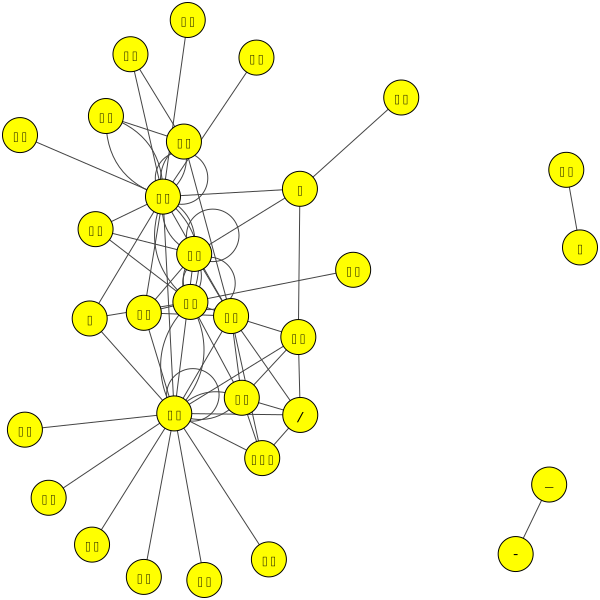

In [ ]:
# -*- coding: utf-8 -*-
# リスト 5-6 施政方針演説のネットワークの構造を分析する例
import re
import numpy as np
from collections import Counter
import MeCab
import itertools
from igraph import *
#from aozora import Aozora

minfreq = 4                   # グラフ描画のときは4に設定し、見やすくする
m = MeCab.Tagger("-Ochasen")  # MeCabで品詞分解する
 
def readin(filename):
    with open(filename, "r") as afile:
        whole_str = afile.read()
    sentenses = (re.sub('。', '。\n', whole_str)).splitlines()
    return [re.sub('　', '', u) for u in sentenses if len(u)!=0]
 
filename = "/content/sample_data/nigen.txt"
string = readin(filename)
 
# 文単位で形態素解析し、名詞だけ抽出し、基本形を文ごとのリストにする
sentensemeishilist = [ \
    [v.split()[2] for v in m.parse(sentense).splitlines() \
       if (len(v.split())>=3 and v.split()[3][:2]=='名詞')] \
    for sentense in string]

# 文ごとにペアリストを作る
doubletslist = [ \
    list(itertools.combinations(meishilist,2)) \
       for meishilist in sentensemeishilist if len(meishilist) >=2 ]
alldoublets = []
for u in doubletslist:  # 文ごとのペアリストのリストをフラットなリストにする
    alldoublets.extend(u)
 
# 名詞ペアの頻度を数える
dcnt = Counter(alldoublets)
 
# 出現頻度順にソートした共起ペアを出力する（上位30ペア）
print('pair frequency', sorted(dcnt.items(), key=lambda x: x[1], reverse=True)[:30])
    # 頻度順に表示
# 名詞ペアの頻度辞書から、頻度が4以上のエントリだけを抜き出した辞書を作る
restricteddcnt = dict( ( (k, dcnt[k]) for k in dcnt.keys() if dcnt[k]>=minfreq ) )
charedges = restricteddcnt.keys()
print(len(charedges))
vertices = list(set( [v[0] for v in charedges] + [v[1] for v in charedges] )) 
# charedgesは(['名詞','名詞'])の形なのでvertid(数字)ペア([1,3])に変換する
edges = [(vertices.index(u[0]), vertices.index(u[1])) for u in charedges]
print(edges)
g = Graph(vertex_attrs={"label": vertices, "name": vertices},edges=edges, directed=False)
#ig.plot(g)
ig.plot(g, vertex_size=35, bbox=(600,600), vertex_color='yellow')



# 新しいセクション

# 新しいセクション

ここは第4章

In [ ]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
x = np.array([[1,2],[2,1],[3,4],[4,3]])
z = linkage(x,'single')
dendrogram(
    z,
    labels =['a','b', 'c', 'd']

)
plt.title('result')
plt.ylabel('distance')
plt.show()

# 第三章　クラスター化するための方法

Python によるテキストマイニング　山内長承　OHMSHA　第3章　2021年
ポイント　クラスター化するための方法について解説


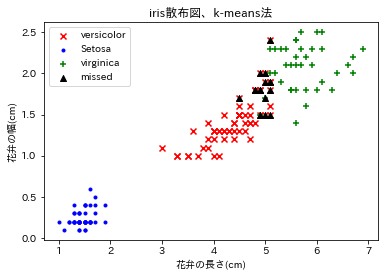

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from sklearn.datasets import load_iris
from sklearn.cluster import  KMeans
import pandas as pd
iris = load_iris()
species = ['Setosa','versicolor','virginica']
irispddata = pd.DataFrame(iris.data, columns = iris.feature_names)
irispdtarget = pd.DataFrame(iris.target,columns=['target'])
kmeans = KMeans(n_clusters=3).fit(irispddata)

irispd = pd.concat([irispddata,irispdtarget],axis=1)
iriskmeans= pd.concat([irispd, pd.DataFrame(kmeans.labels_,columns=['kmeans'])], axis=1)
irispd0 = iriskmeans[iriskmeans.kmeans == 0]
irispd1 = iriskmeans[iriskmeans.kmeans == 1]
irispd2 = iriskmeans[iriskmeans.kmeans == 2]
 
dic = {}
dic[ iriskmeans['kmeans'][25] ] = iriskmeans['target'][25]
dic[ iriskmeans['kmeans'][75] ] = iriskmeans['target'][75]
dic[ iriskmeans['kmeans'][125] ] = iriskmeans['target'][125]
d = np.array([dic[u] for u in iriskmeans['kmeans']])
irisdiff = iriskmeans[iriskmeans.target != d ]
 
plt.scatter(irispd0['petal length (cm)'], irispd0['petal width (cm)'], c='red', label=species[dic[0]], marker='x')
plt.scatter(irispd1['petal length (cm)'], irispd1['petal width (cm)'], c='blue',label=species[dic[1]], marker='.')
plt.scatter(irispd2['petal length (cm)'], irispd2['petal width (cm)'], c='green',label=species[dic[2]], marker='+')
 
plt.scatter(irisdiff['petal length (cm)'], irisdiff['petal width (cm)'], c='black',label='missed', marker='^')
plt.title('iris散布図、k-means法')
plt.xlabel('花弁の長さ(cm)')
plt.ylabel('花弁の幅(cm)')
plt.legend()
plt.show()


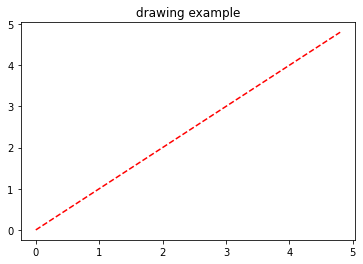

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0., 5., 0.2)
plt.title('drawing example')
plt.plot(t,t,'r--', label ='linear')

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
 
colors = ['red', 'blue', 'green' ]
markers = ['x', 'point', 'plus' ]
iris = load_iris() 
species = ['Setosa', 'Versicolour', 'Virginica']

irispd = pd.concat([irisdata, iristarget], axis=1)  
pca = PCA(n_components = 4)       
pca.fit(irisdata)
print('主成分', pca.components_)                 
print('平均', pca.mean_)
print('分散', pca.explained_variance_ )
print('寄与率', pca.explained_variance_ratio_)
print('累積寄与率', np.cumsum(pca.explained_variance_ratio_))

transformed1 = pca.transform(irisdata[irispd.target==1])
transformed2 = pca.transform(irisdata[irispd.target==2])
plt.scatter([u[0] for u in transformed0], [u[1] for u in transformed0], c='red', \
             label=species[0], marker='x')
plt.scatter([u[0] for u in transformed1], [u[1] for u in transformed1], c='blue', \
    label=species[1], marker='.')
plt.scatter([u[0] for u in transformed2], [u[1] for u in transformed2], c='green', \
    label=species[2], marker='+')
plt.title('irisデータの主成分分析')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.legend()
plt.show()



NameError: ignored

In [ ]:
import pandas as pd
indata =[('Toronto',175,68,25),('Detroit', 183,70,23),('Boise',190,72,26)]
df = pd.DataFrame(data=indata,columns=['出生地','身長','体重','年齢'],index=['Bill','John','Fred'])
print(df)


          出生地   身長  体重  年齢
Bill  Toronto  175  68  25
John  Detroit  183  70  23
Fred    Boise  190  72  26


In [ ]:
print(df['体重'])

In [ ]:
for u in  text7:
  print(u, end='')
  if u =='.':
       print()



PierreVinken,61yearsold,willjointheboardasanonexecutivedirectorNov.29.
Mr.VinkenischairmanofElsevierN.V.,theDutchpublishinggroup.
RudolphAgnew,55yearsoldandformerchairmanofConsolidatedGoldFieldsPLC,wasnamed*-1anonexecutivedirectorofthisBritishindustrialconglomerate.
Aformofasbestosonceused**tomakeKentcigarettefiltershascausedahighpercentageofcancerdeathsamongagroupofworkersexposed*toitmorethan30yearsago,researchersreported0*T*-1.
Theasbestosfiber,crocidolite,isunusuallyresilientonceitentersthelungs,withevenbriefexposurestoitcausingsymptomsthat*T*-1showupdecadeslater,researcherssaid0*T*-2.
LorillardInc.,theunitofNewYork-basedLoewsCorp.that*T*-2makesKentcigarettes,stoppedusingcrocidoliteinitsMicronitecigarettefiltersin1956.
Althoughpreliminaryfindingswerereported*-2morethanayearago,thelatestresultsappearintoday'sNewEnglandJournalofMedicine,aforumlikely*tobringnewattentiontotheproblem.
ALorillardspokewomansaid,``Thisisanoldstory.
We'retalkingaboutyearsagobeforeanyoneheardofasbestoshavinga

In [ ]:
from nltk.corpus import inaugural
print(inaugural.raw('1789-Washington.txt'))


Fellow-Citizens of the Senate and of the House of Representatives:

Among the vicissitudes incident to life no event could have filled me with greater anxieties than that of which the notification was transmitted by your order, and received on the 14th day of the present month. On the one hand, I was summoned by my Country, whose voice I can never hear but with veneration and love, from a retreat which I had chosen with the fondest predilection, and, in my flattering hopes, with an immutable decision, as the asylum of my declining years -- a retreat which was rendered every day more necessary as well as more dear to me by the addition of habit to inclination, and of frequent interruptions in my health to the gradual waste committed on it by time. On the other hand, the magnitude and difficulty of the trust to which the voice of my country called me, being sufficient to awaken in the wisest and most experienced of her citizens a distrustful scrutiny into his qualifications, could not bu

In [ ]:
/usr/local/lib/python3.7/dist-packages

SyntaxError: ignored

In [ ]:
! pip install nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] pe08................ Cross-Framework and Cross-Domain Parser
                           Evaluation Shared Task

Collections:

([*] marks installed packages)

Download which package (l=list; x=cancel)?
  Identifier> c
    Error loading c: Package 'c' not found in index

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> c

Data Server:
  - URL: <https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml>
  - 7 Package Collections Available
  - 107 Individual Packages Availab

KeyboardInterrupt: ignored

In [ ]:
from nltk.corpus import jeita
jeita readme()

SyntaxError: ignored